<a href="https://colab.research.google.com/github/Anya-Gupta-05/MNIST_Digit_Classification/blob/main/MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [11]:

 (x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train=to_categorical(y_train,10)
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
print("x_train shape:", x_train.shape)  # (60000, 28, 28)
print("y_train shape:", y_train.shape)  # (60000, 10)
y_test=to_categorical(y_test,10)

x_train shape: (60000, 28, 28)
y_train shape: (60000, 10)


In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test Accuracy:",test_acc*100)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8801 - loss: 0.4183 - val_accuracy: 0.9656 - val_loss: 0.1141
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9681 - loss: 0.1033 - val_accuracy: 0.9724 - val_loss: 0.0888
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9787 - loss: 0.0688 - val_accuracy: 0.9721 - val_loss: 0.0897
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9836 - loss: 0.0518 - val_accuracy: 0.9778 - val_loss: 0.0742
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9867 - loss: 0.0383 - val_accuracy: 0.9770 - val_loss: 0.0738
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9907 - loss: 0.0288 - val_accuracy: 0.9743 - val_loss: 0.0941
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9917 - loss: 0.0252 - val_accuracy: 0.9783 - val_loss: 0.0842
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9924 - loss: 0.022

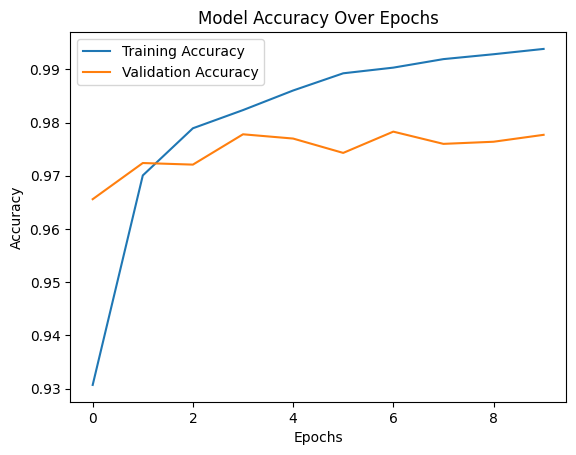

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


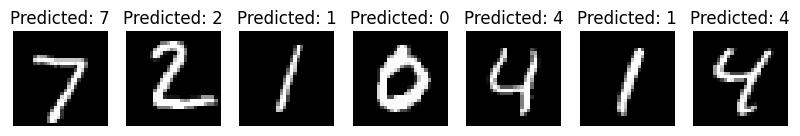

In [5]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()
predictions = model.predict(x_test[:7])

plt.figure(figsize=(10, 5))
for i in range(7):
    plt.subplot(1, 7, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()

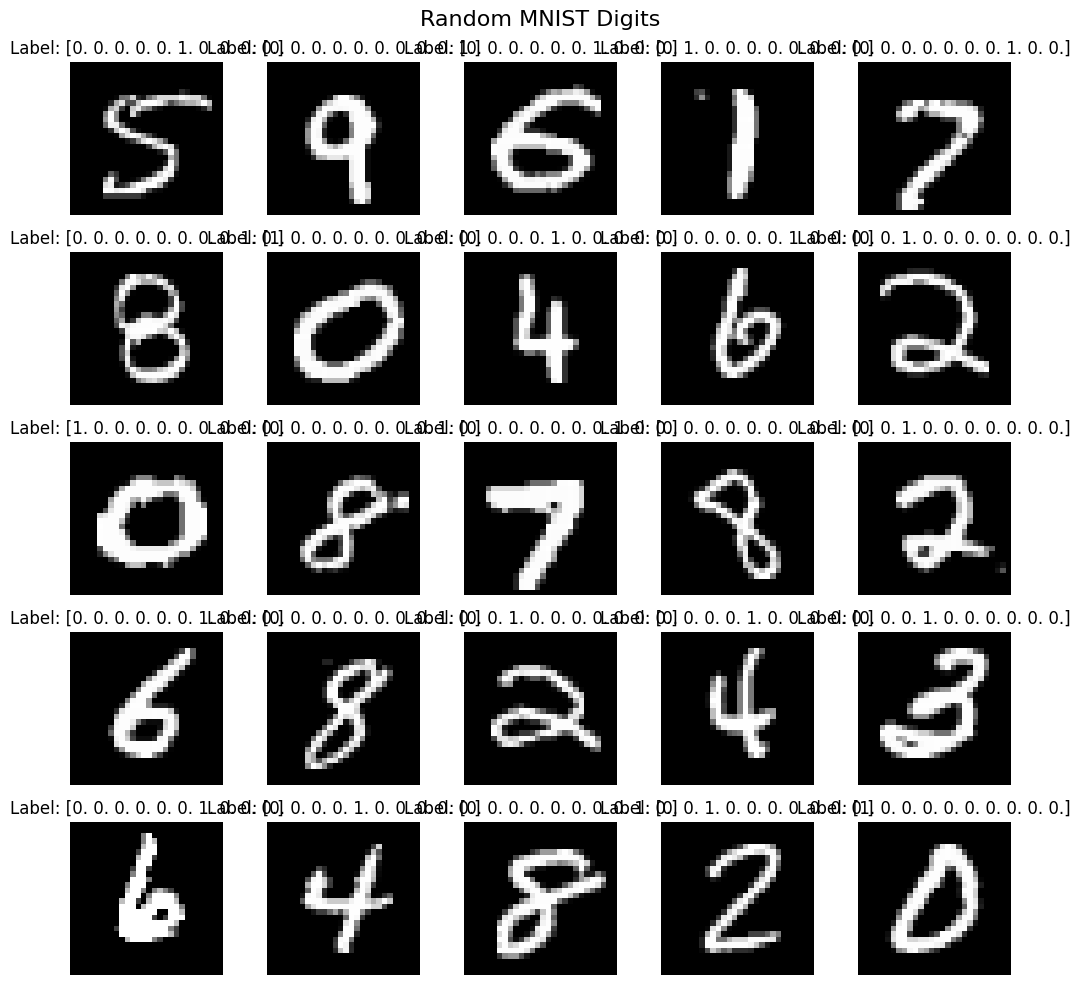

In [7]:
def plot_random_digits(x, y, n=25):
    indices = np.random.choice(range(len(x)), n, replace=False)
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(indices):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x[idx], cmap='gray')
        plt.title(f"Label: {y[idx]}")
        plt.axis('off')
    plt.suptitle("Random MNIST Digits", fontsize=16)
    plt.tight_layout()
    plt.show()

plot_random_digits(x_train, y_train)


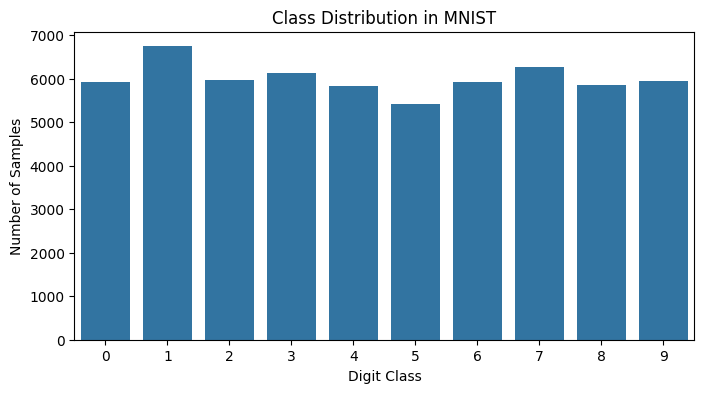

In [14]:
def class_distribution(y):
  y_labels=np.argmax(y,axis=1)
  plt.figure(figsize=(8, 4))
  sns.countplot(x=y_labels)
  plt.title("Class Distribution in MNIST")
  plt.xlabel("Digit Class")
  plt.ylabel("Number of Samples")
  plt.show()

class_distribution(y_train)


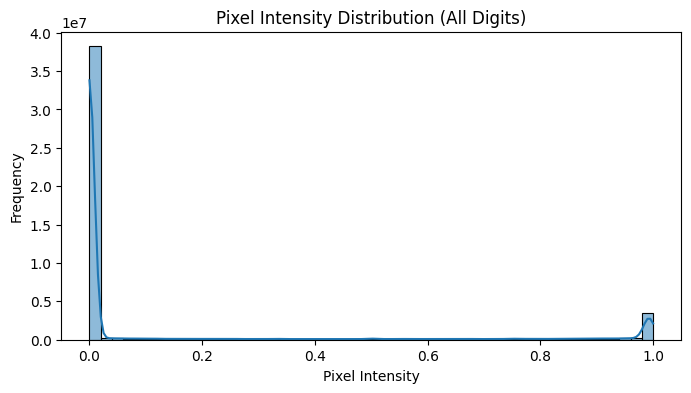

In [15]:
def pixel_intensity_distribution(x):
    pixels = x.reshape(-1)  # Flatten all pixels
    plt.figure(figsize=(8, 4))
    sns.histplot(pixels, bins=50, kde=True)
    plt.title("Pixel Intensity Distribution (All Digits)")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

pixel_intensity_distribution(x_train)


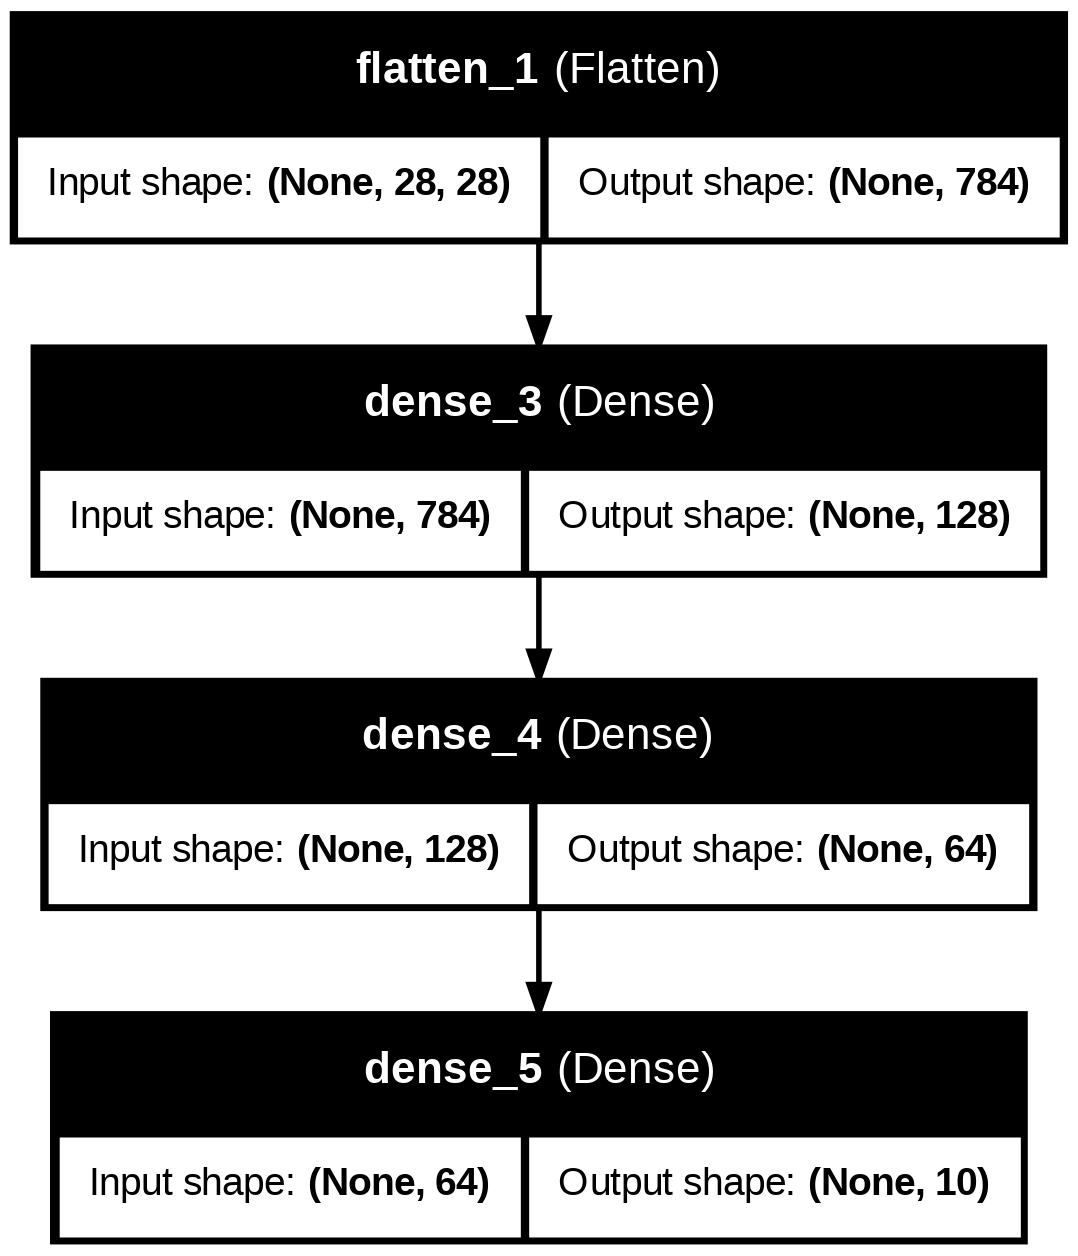

In [17]:
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Save model plot as an image
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# If in notebook or matplotlib-friendly environment
from IPython.display import Image
Image(filename='model_architecture.png')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


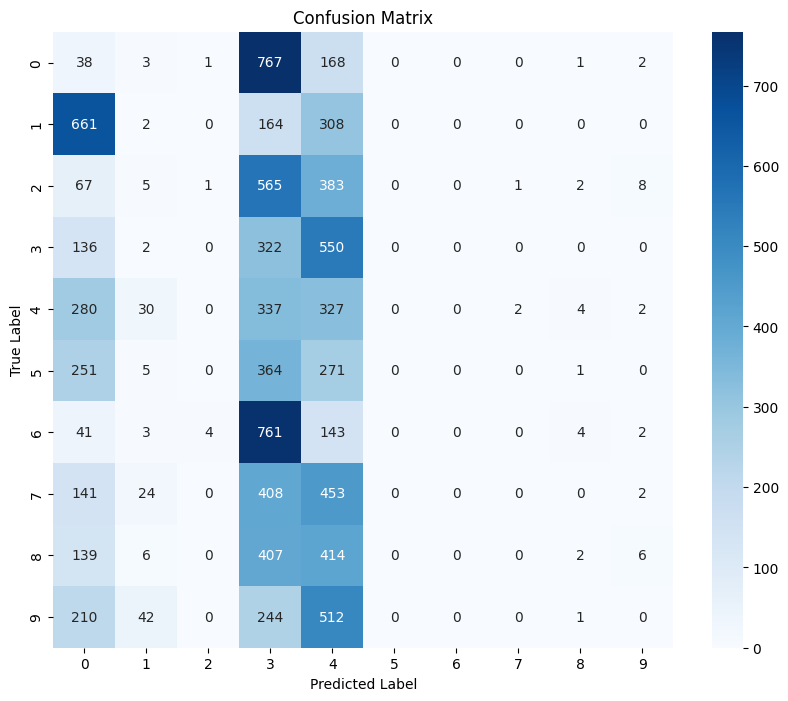

In [18]:
# Predict and convert from one-hot
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
